[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aprendizaje-automatico-dc-uba-ar/material/blob/main/notebooks/notebook_02_titanic-published.ipynb)

# Titanic

En este ejercicio, deberán descargar y explorar el contenido de la base de datos en formato CSV (valores separados por comas) que contiene datos de pasajeros del naufragio del transatlántico Titanic en 1912, incluyendo edad, sexo, clase del pasaje y supervivencia a la tragedia, entre otros.

Completar el notebook de manera de clasificar a los pasajeros en supervivientes y no supervivientes
tan bien como sea posible. 

Atención, en este momento de la materia no está permitido usar ninguna técnica de Aprendizaje Automático.
El objetivo es conseguir un buen porcentaje de aciertos sobre estos datos.


## Antes de empezar

Preparamos algunas funciones auxiliares para trabajar:

1. `cargar_datos`: lee el csv con los datos 
1. `predict`: dado un conjunto de datos, devuelve la predicción para cada instancia
1. `accuracy`: métrica sobre el desempeño de una predicción definida como:

  $$accuracy = \frac{\#aciertos}{\#predicciones}$$
        
  Su interpretación puede ser:  en cuántos casos acerté.
        

In [191]:
from IPython.display import display
import pandas as pd
from typing import Tuple

def cargar_datos() -> Tuple[pd.DataFrame, pd.Series]:
    """
    Carga los datos del Titanic desde un archivo CSV y devuelve las características (X) y las etiquetas (y).

    Returns:
        X (pd.DataFrame): Características del dataset, excluyendo la columna "Survived" y "PassengerId".
        y (pd.Series): Etiquetas del dataset, correspondientes a la columna "Survived".
    """
    df = pd.read_csv(
        "https://github.com/aprendizaje-automatico-dc-uba-ar/material/raw/main/datasets/data_02/titanic.csv"
    )
    X = df.drop("Survived", axis=1).drop("PassengerId", axis=1)
    y = df.Survived
    return X, y


def predict(X: pd.DataFrame) -> list:
    """
    Predice la salida para cada fila de los datos. Debe definirse primero la función predict_instance para utilizarla
    """
    y_predicted = []
    for x in X.itertuples():
        try:
            y_i = predict_instance(x)
        except NameError:
            raise NameError("Por favor definir la función predict_instance")
        y_predicted.append(y_i)
    return y_predicted


def accuracy(y_predicted: list, y_real: list) -> float:
    """
    Calcula el accuracy entre un y_predicted y un y_real.
    """
    TP_TN = sum([y_i == y_j for (y_i, y_j) in zip(y_predicted, y_real)])
    P_N = len(y_real)
    return TP_TN / P_N

In [239]:
for x in X.itertuples():
    print(x[4])

35.0
35.0
25.0
nan
18.0
40.5
nan
16.0
39.0
10.0
38.0
32.0
33.0
16.0
17.0
50.0
26.0
38.0
36.0
52.0
52.0
24.0
36.0
58.0
16.0
3.0
22.0
22.0
34.0
nan
28.0
24.0
9.0
31.0
47.0
nan
31.0
46.0
55.5
49.0
nan
30.0
16.0
54.0
30.0
30.0
nan
17.0
22.0
22.0
nan
45.0
54.0
31.0
27.0
nan
44.0
19.0
39.0
1.0
27.0
32.0
19.0
nan
20.0
21.0
18.0
28.0
nan
16.0
nan
61.0
nan
6.0
3.0
66.0
13.0
27.0
17.0
nan
24.0
9.0
35.0
42.0
nan
41.0
51.0
24.0
24.0
nan
60.0
36.0
nan
nan
36.0
3.0
70.0
30.0
21.0
35.0
21.0
20.0
27.0
19.0
38.0
19.0
39.0
nan
33.0
39.0
nan
33.0
22.0
18.0
nan
20.0
29.0
0.83
34.5
45.0
18.0
18.0
25.0
46.0
24.0
39.0
19.0
nan
36.0
nan
29.0
15.0
9.0
52.0
20.0
22.0
36.0
50.0
7.0
25.0
nan
31.0
37.0
28.0
nan
50.0
61.0
42.0
28.0
nan
42.0
nan
51.0
22.0
nan
31.0
45.0
33.0
24.0
nan
17.0
4.0
2.0
74.0
24.0
nan
30.0
41.0
nan
51.0
nan
18.0
23.0
29.0
42.0
23.0
23.0
18.0
30.0
26.0
22.0
30.0
50.0
22.0
nan
7.0
25.0
36.0
nan
nan
45.5
19.0
35.0
13.0
34.0
23.0
43.0
31.0
48.0
27.0
21.0
28.0
28.0
nan
34.0
56.0
44.0
18.0
21.0
22

## Ejercicio

Antes de empezar cargamos los datos y los separamos en `X` (dataframe de instancias con atributos que usaremos como columnas y datos como filas), `y` (vector de clases a las que corresponde cada instancia).

Definición de los datos:

Variable|Definición|Interpretación de valores
--------|--------|--------
survival|Sobreviviente|0 = No, 1 = Sí
pclass|Clase de pasaje|1 = 1era, 2 = 2da, 3 = 3era
sex|Sexo|
Age|Edad en años|
sibsp|# hermanos/as/ esposos/as a bordo|
parch|# padres / hijos a bordo|
ticket|Número de Ticket|
fare|Tarifa|
cabin|Número de cabina|
embarked|Puerto de embarque|C = Cherbourg<br>Q = Queenstown<br>S = Southampton


Una recomendación, para este ejercicio y para todos los ejercicios, antes de comenzar el ejercicio explorar los datos para ver qué forma/característica tiene y ganar intuición sobre el dominio en el que se va a trabajar.

Entre muchas cosas, se puede:

  - Inspeccione y verifique el tipo de dato del dataframe. Calcule medidas resumen para las distintas columnas
  - Graficar distintos atributos y observar su distribución (Ej. la edad: ¿son más jóvenes? ¿O más viejos? ¿O un poco y un poco?). 
  - Graficar relaciones entre atributos y relaciones entre atributos y la salida (si sobrevivió o no). Ver opciones de `seaborn` sugeridas en el notebook anterior.
  

***Obs.*** Recuerde importar las librerías necesarias como `Matplotlib` o `Seaborn`.


In [192]:
X, y = cargar_datos()

In [193]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
1,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S
2,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
3,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
4,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
796,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
797,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
798,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
799,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C


In [194]:
y

0      1
1      0
2      0
3      0
4      1
      ..
796    0
797    1
798    0
799    0
800    0
Name: Survived, Length: 801, dtype: int64

In [195]:
df_total = X.merge(y,left_index=True,right_index=True)
df_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C,1
1,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S,0
2,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S,0
3,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S,0
4,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
796,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S,0
797,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1
798,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0
799,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,0


In [178]:
df_total.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [124]:
# Gente que sobrevivio
supervivientes_sexo = df_total[["Sex","Survived"]].groupby(by=["Sex"]).sum().reset_index()

# Dataframe de gente que viajo por sexo
pasajeros_sexo =pd.DataFrame(df_total["Sex"].value_counts())

# Cantidad de hombres totales en el viaje
total_men = int(pasajeros_sexo.iloc[0].sum())
# Cantidad de mujeres totales en el viaje
total_women = int(pasajeros_sexo.iloc[1].sum())


In [ ]:
supervivientes_sexo[""]

,Sex,Survived
0,female,214
1,male,101


In [197]:
# Gente que sobrevivio
supervivientes_edad = df_total[["Age","Survived"]].groupby(by=["Age"]).sum().reset_index()

# Dataframe de gente que viajo por sexo
pasajeros_edad =pd.DataFrame(df_total["Age"].value_counts())


In [350]:
edad_test = df_total[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived']]
bins = [0,5,15,25,37,55,100]
labels = ["g1","g2","g3","g4","g5","g6"]
edad_test["Grupo"] = pd.cut(edad_test["Age"],bins= bins,labels= labels)
edad_test[["Grupo","Survived"]].groupby(by=["Grupo"]).sum().reset_index()

C:\Users\ivanl\AppData\Local\Temp\ipykernel_21036\2522230465.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edad_test[["Grupo","Survived"]].groupby(by=["Grupo"]).sum().reset_index()


,Grupo,Survived
0,g1,27
1,g2,17
2,g3,72
3,g4,89
4,g5,53
5,g6,12


In [397]:
edad_test[["Survived","Embarked"]].groupby(by=["Embarked"]).sum().sort_values(by= ["Survived"],ascending= False)

,Survived
Embarked,
S,199
C,88
Q,26


In [398]:
edad_test[["Survived","Embarked"]].groupby(by=["Embarked"]).count().sort_values(by= ["Survived"],ascending= False)

,Survived
Embarked,
S,573
C,157
Q,69


In [214]:
edad_test[["Survived","Pclass", "Sex","Grupo"]].groupby(by=["Pclass", 'Sex',"Grupo"]).sum().sort_values(by= "Survived",ascending= False)

C:\Users\ivanl\AppData\Local\Temp\ipykernel_21036\1216306414.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edad_test[["Survived","Pclass", "Sex","Grupo"]].groupby(by=["Pclass", 'Sex',"Grupo"]).sum().sort_values(by= "Survived",ascending= False)


Survived
Pclass Sex    Grupo          
1      female g4           38
2      female g4           36
1      male   g4           27
       female g3           26
3      female g3           22
2      female g3           18
3      male   g4           17
       female g4           13
              g1           10
       male   g3           10
2      male   g1            7
1      female g6            7
3      male   g1            5
1      female g5            5
       male   g3            4
3      male   g2            4
2      female g1            3
1      male   g6            3
2      female g5            2
       male   g4            2
1      male   g1            2
              g5            2
2      female g2            2
       male   g2            1
1      male   g2            1
2      male   g6            1
3      female g6            1
2      male   g3            1
3      male   g5            0
1      female g1            0
3      female g5            0
              g2            0
2      male   g5            0
1      female g2            0
2      female g6            0
3      male   g6            0

In [215]:
edad_test[["Survived","Pclass", "Sex","Grupo"]].groupby(by=["Pclass", 'Sex',"Grupo"]).count().sort_values(by= "Survived",ascending= False)

C:\Users\ivanl\AppData\Local\Temp\ipykernel_21036\3877472121.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edad_test[["Survived","Pclass", "Sex","Grupo"]].groupby(by=["Pclass", 'Sex',"Grupo"]).count().sort_values(by= "Survived",ascending= False)


Survived
Pclass Sex    Grupo          
3      male   g4          106
              g3           88
1      male   g4           59
2      male   g4           42
3      female g3           41
2      female g4           40
1      female g4           39
3      female g4           34
1      female g3           27
2      male   g3           22
       female g3           19
1      male   g6           18
3      female g1           13
       male   g1           12
1      male   g3           11
3      male   g2           10
       female g2            7
1      female g6            7
2      male   g1            7
              g6            6
3      male   g6            6
1      male   g5            5
       female g5            5
2      male   g5            4
       female g1            3
3      male   g5            3
2      female g5            2
              g2            2
1      male   g1            2
2      male   g2            1
       female g6            1
3      female g6            1
1      male   g2            1
       female g1            1
              g2            0
3      female g5            0

In [70]:
round(df_total.groupby(by=["Age"]).count()/total_rows*100)

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
Age,,,,,,,,,,
0.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
70.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
x_columns = X.columns
x_columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

Vamos a hacer un poco de analisis, vamos a basarnos en un poco en la consigna de "Mujeres y niños primero".
Hagamos un vistazo para ver la composicion del dataset, haciendo foco en las siguientes cuestiones
- Genero
- Edad
- Genero

Ya que como hipotesis inicial yo sugiero que estas cuestiones son las que tendran mas peso, luego analizaremos otras cosas

### Funcion que contruye un pareto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def pareto(column,label):
    df = X
    # Step 1: Compute age counts (sorted descendingly by default)
    age_counts = df[column].value_counts()
    total = age_counts.sum()

    # Step 2: Calculate percentages and cumulative percentages
    percentages = (age_counts / total) * 100
    cumulative_percent = percentages.cumsum()

    # Step 3: Plot
    fig, ax1 = plt.subplots(figsize=(50, 20))

    # Bar plot for counts
    ax1.bar(age_counts.index.astype(str), age_counts.values, color='skyblue')
    ax1.set_xlabel(f'{label}')
    ax1.set_ylabel('Count', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    # Line plot for cumulative percentage
    ax2 = ax1.twinx()
    ax2.plot(age_counts.index.astype(str), cumulative_percent, 
            color='red', marker='o', linestyle='-', linewidth=2)
    ax2.set_ylabel('Cumulative Percentage (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 110)  # Extend y-axis slightly beyond 100%

    # Add a horizontal line at 80% for Pareto effect (optional)
    ax2.axhline(80, color='orange', linestyle='--')

    plt.title(f"Pareto Chart of {label} Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

[1 3 2]
['Homer, Mr. Harry ("Mr E Haven")' 'Rintamaki, Mr. Matti'
 'Butler, Mr. Reginald Fenton' 'Moutal, Mr. Rahamin Haim'
 'Aks, Mrs. Sam (Leah Rosen)' 'van Billiard, Mr. Austin Blyler'
 'Yousseff, Mr. Gerious' 'Mudd, Mr. Thomas Charles'
 'Andrews, Mr. Thomas Jr' 'Van Impe, Miss. Catharina'
 'Hoyt, Mr. Frederick Maxfield' 'Bing, Mr. Lee' 'Markun, Mr. Johann'
 'Osen, Mr. Olaf Elon' 'Calic, Mr. Jovo'
 'Baxter, Mrs. James (Helene DeLaudeniere Chaput)'
 'Barber, Miss. Ellen "Nellie"' 'Goncalves, Mr. Manuel Estanslas'
 'Young, Miss. Marie Grice' 'Taussig, Mr. Emil'
 'Hays, Mrs. Charles Melville (Clara Jennings Gregg)'
 'Brown, Miss. Amelia "Mildred"'
 'de Messemaeker, Mrs. Guillaume Joseph (Emma)' 'Bonnell, Miss. Elizabeth'
 'Sunderland, Mr. Victor Francis' 'Coutts, Master. William Loch "William"'
 'Dennis, Mr. Samuel' 'Barton, Mr. David John'
 'Theobald, Mr. Thomas Leonard' 'Williams, Mr. Howard Hugh "Harry"'
 'Davis, Miss. Mary' 'Richards, Mrs. Sidney (Emily Hocking)'
 'Ford, Miss. Robi

A continuación se encuentra la primera definición de una función que predice. Esta tarea se resuelve devolviendo la etiqueta 0 o 1. 

En este punto se puede usar la información disponible del dataframe que considere necesaria, pero para esta primer implementación, la solución planteada es trivial: sobrevivieron todas las personas.



In [7]:
def predict_instance(x: pd.Series) -> int:
    """
    Predice la clase para instancia x.
    """
    prediction = 1  # CAMBIAR ESTA LINEA POR REGLAS

    return prediction

Evaluamos este clasificador:

In [8]:
y_pred = predict(X)
# Completar el algoritmo para mejorar esta performance. 

print(f"Accuracy: {round(accuracy(y_pred, y), 3)}")

Accuracy: 0.393


#### Analisis de Edades

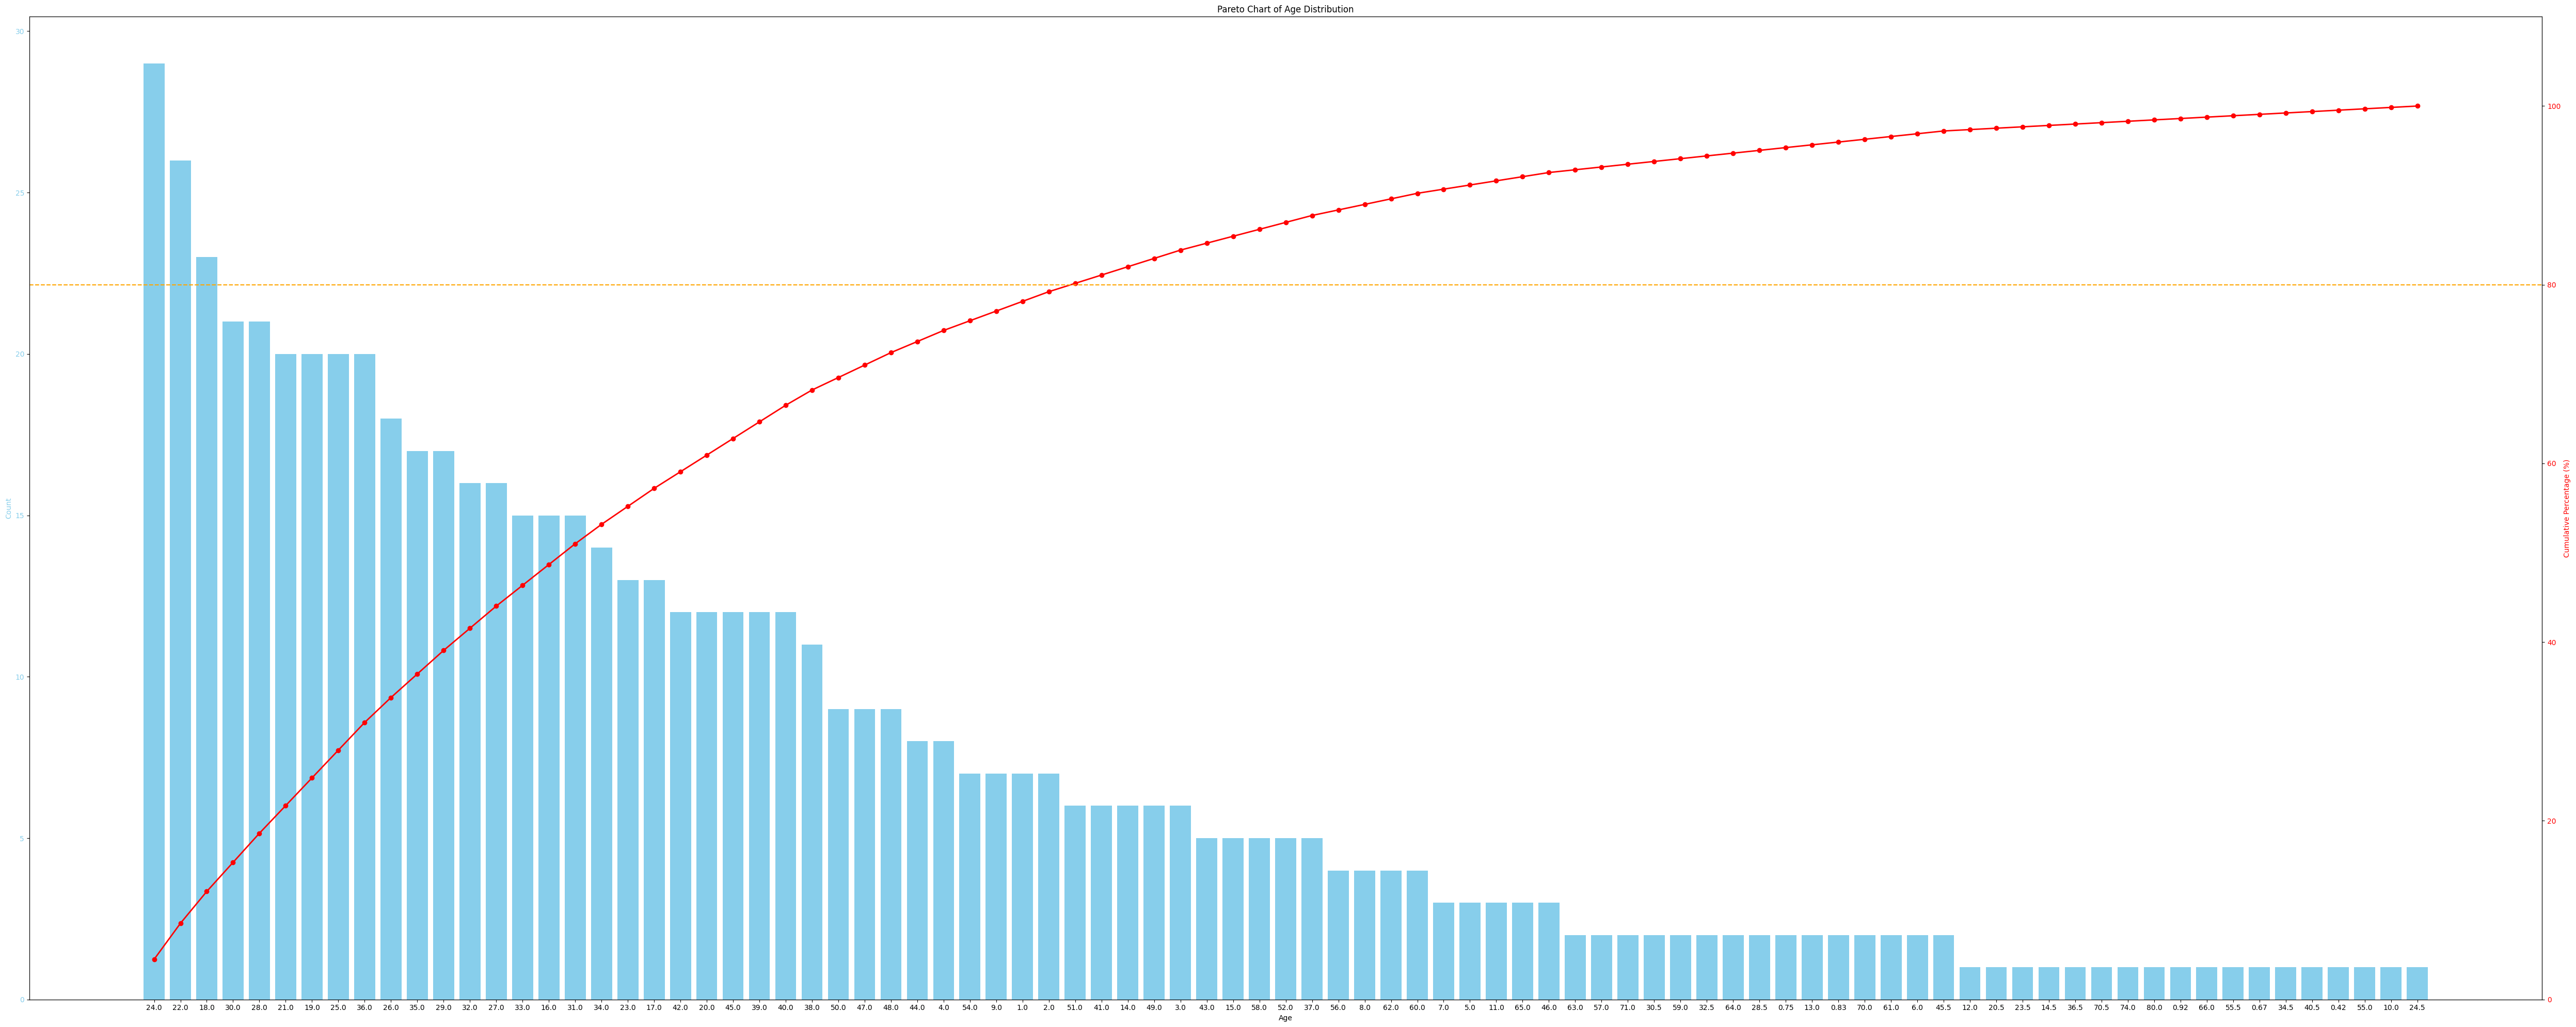

In [45]:
pareto("Age","Age")

#### Analisis de Sexo

### Consigna

La tarea será escribir un algoritmo para predecir si sobrevivirá o no por instancia que obtenga el mejor valor de Accuracy.

Para hacerlo sólo está permitido utilizar en la predicción reglas que tomen datos de la instancia (sin entrenamiento previo).

Ej: `prediction = x.Sex=="female"`
o combinaciones más complejas con condicionales (if), pero que únicamente utilicen los atributos de la instancia presente (`if x.Sex=="female": prediction = (x.Age % 2 == 0)  else: prediction = 0`. 

Como lo que tenemos es un `dataframe` de Pandas, podemos acceder a los atributos también así:
```
if x["Age"] > 10: 
    return 1
else:
    ...
```

**No está permitido utilizar otras herramientas/técnicas en este punto.**

In [240]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.550,NaN,C
1,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.125,NaN,S
2,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.000,NaN,S
3,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.050,NaN,S
4,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.350,NaN,S


In [458]:
def predict_instance(x: pd.Series):
    if x[3] =='female' and x[5] <=2 and x[6]<=2:
        prediction = 1
    elif x[1] == 1  and x[4] <37 and x[5] <=2 and x[6]<=2: #Hombres de primera clase, joven y con poca familia dentro del barco
        prediction = 1
    elif x[1] == 2  and x[4] <18 and x[5] <=2 and x[6]<=2: # Hombres de segunda clase muy jovenes y con poca familia dentro del barco
        prediction = 1
    elif x[4] <5 and x[5] <=2 and x[6]<=2: # Niños muy chicos, independientemente de la clase y con poca familia dentro del barco
        prediction = 1
    else:
        prediction = 0
    ## FIN DE COMPLETAR
    return prediction



In [459]:
y_pred = predict(X)
# Completar el algoritmo para mejorar esta performance. 

print(f"Accuracy: {round(accuracy(y_pred, y), 3)}")

Accuracy: 0.815


¡A armar nuevas funciones de predicción y mejorar el Accuracy!

# A probar
Al parecer los factores que mas importan son  (por ahora):
- Sexo, las mujeres tuvieron preferencia independientemente de la clase social
- los "niños" no parece ser tan importante, sino en general gente joven.
- Se priorizo gente con pocos hijos/padres a bordo